pygame 2.1.0 (SDL 2.0.16, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


Tasa de convergencia: 0.2959183673469387


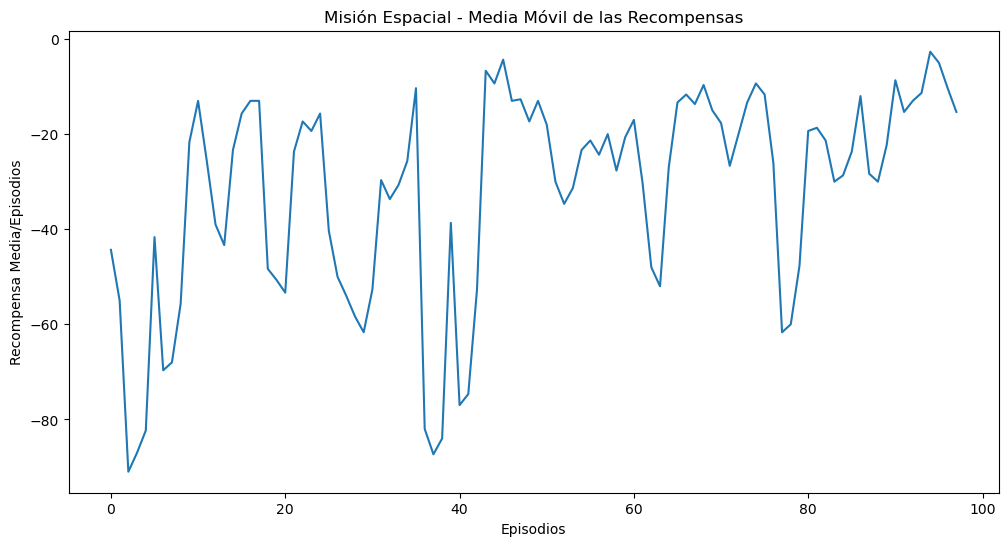

In [4]:
env = MisionEspacial()

# Inicialización de la tabla Q
q_table = np.random.randn(env.grid_rows, env.grid_cols, len(NaveAction))
learning_rate = 0.1 
discount = 0.99  
epsilon = 1.0
epsilon_decay = 0.99 
min_epsilon = 0.1
episodes = 100  
ep_rewards = []

plt.ion()
fig, ax = plt.subplots(figsize=(12, 6))


for episode in range(episodes):
    env.reset()
    done = False
    total_reward = 0
    state = tuple(env.agent_pos)

    if np.random.random() > epsilon:
        action = np.argmax(q_table[state])
    else:
        action = random.randint(0, len(NaveAction) - 1)
    action_enum = NaveAction(action)

    while not done:
        done = env.perform_action(action_enum)
        new_state = tuple(env.agent_pos)
        reward = 1 if done else -1
        env.render()

        if np.random.random() > epsilon:
            next_action = np.argmax(q_table[new_state])
        else:
            next_action = random.randint(0, len(NaveAction) - 1)
        next_action_enum = NaveAction(next_action)

        # Actualización de la tabla Q 
        current_q = q_table[state + (action,)]
        next_q = q_table[new_state + (next_action,)]
        new_q = current_q + learning_rate * (reward + discount * next_q - current_q)
        q_table[state + (action,)] = new_q

        state = new_state
        action = next_action
        action_enum = next_action_enum
        total_reward += reward

    ep_rewards.append(total_reward)
    
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Calcular la media móvil
window_size = 3  
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')

# Calcular la tasa de convergencia
convergence_rate = (moving_avg_rewards[-1] - moving_avg_rewards[0]) / len(moving_avg_rewards)
print("Tasa de convergencia:", convergence_rate)

# Graficar la recompensa promedio móvil
plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('Misión Espacial - Media Móvil de las Recompensas')
plt.ylabel('Recompensa Media/Episodios')
plt.xlabel('Episodios')
plt.show()

env.close()
plt.ioff()
plt.show()
